# Sandbox 2 - City and Ride Data

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats

## Import Data

In [2]:
# import ride and city data to Pandas dataframe
ride_data_file = "Resources/ride_data.csv"
city_data_file = "Resources/city_data.csv"
ride_df = pd.read_csv(ride_data_file)
city_df = pd.read_csv(city_data_file)
print(ride_df.head())
print(city_df.head())

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


## Clean and Examine City Data

In [3]:
# get number of rows for each column
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
# examine city data for nan/null values (count and drop)
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# make sure driver count is integer type
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# count total of each type of city
city_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Clean and Examine Ride Data

In [7]:
#count rows in ride data
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
# find nan/null values in ride data
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
# check data types are correct
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
#convert date column to datetime
ride_df['date']= pd.to_datetime(ride_df['date'])

# Merge Data

In [11]:
# merge both datframes on city column

merged_df = pd.merge(ride_df, city_df, how='left', on=['city','city'])
merged_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Create new dataframes for each city type

In [12]:
urban_df = merged_df[merged_df['type']=='Urban']
suburban_df = merged_df[merged_df["type"] == "Suburban"]
rural_df = merged_df[merged_df["type"] == "Rural"]

# example
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [13]:
# get ride counts of each city by type

urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [14]:
# get average ride fare for each city by type

urban_fare_avg = urban_df.groupby(['city']).mean(numeric_only=True)['fare']
suburban_fare_avg = suburban_df.groupby(['city']).mean(numeric_only=True)['fare']
rural_fare_avg = rural_df.groupby(['city']).mean(numeric_only=True)['fare']
urban_fare_avg.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
urban_driver_count = urban_df.groupby(['city']).mean(numeric_only=True)['driver_count']
suburban_driver_count = suburban_df.groupby(['city']).mean(numeric_only=True)['driver_count']
rural_driver_count = rural_df.groupby(['city']).mean(numeric_only=True)['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

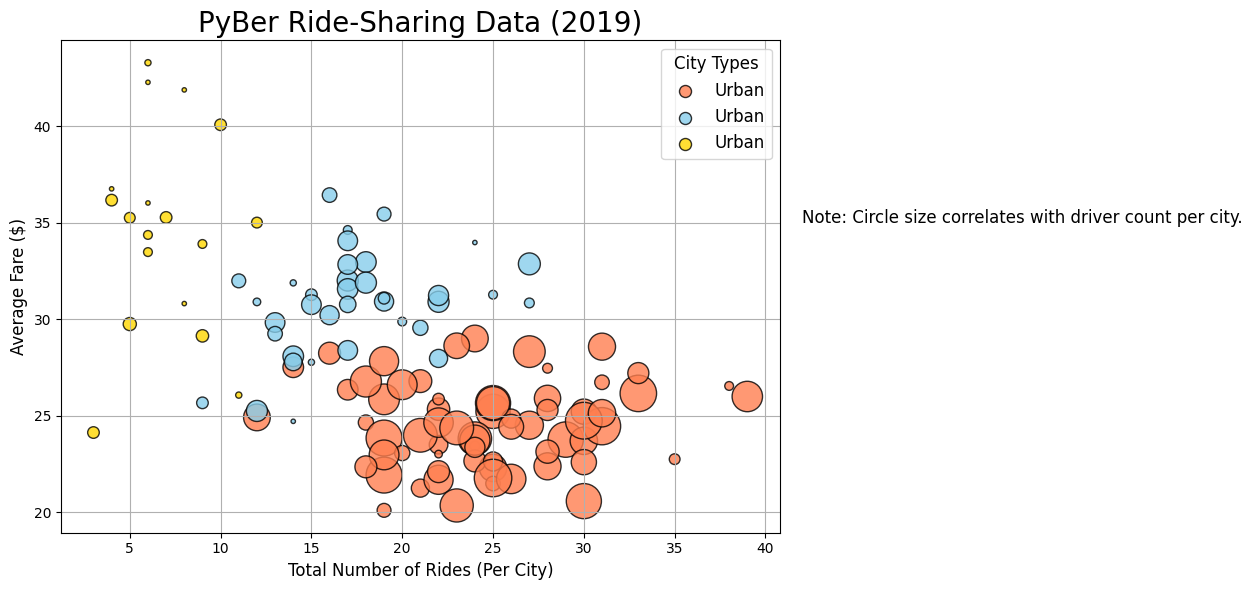

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(urban_ride_count, 
           urban_fare_avg,
           s=10*urban_driver_count, 
           c="coral",
           edgecolor="black", 
           linewidths=1,
           alpha=0.8, 
           label="Urban")
ax.scatter(suburban_ride_count, 
           suburban_fare_avg,
           s=10*suburban_driver_count, 
           c="skyblue",
           edgecolor="black", 
           linewidths=1,
           alpha=0.8, 
           label="Urban")
ax.scatter(rural_ride_count, 
           rural_fare_avg,
           s=10*rural_driver_count, 
           c="gold",
           edgecolor="black", 
           linewidths=1,
           alpha=0.8, 
           label="Urban")           
ax.set_title("PyBer Ride-Sharing Data (2019)", fontsize=20)
ax.set_ylabel("Average Fare ($)", fontsize=12)
ax.set_xlabel("Total Number of Rides (Per City)", fontsize=12)
ax.grid(True)
# Add the legend.
lgnd = ax.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
fig.tight_layout()

# Incorporate a text label about circle size.
ax.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save to image file
fig.savefig("analysis/2019 Ride Share Scatter.png")